In [1]:
!pip install pystan==2.19.1.1
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (10, 7.5)
plt.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/Project BT19MEC022/Dataset/Complete_datafinal.csv")
df.head()

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,Nagpur,2017-03-12,32.0,20.6,26.1,29.8,20.6,25.3,3.4,...,25.7,10,NaN,2017-03-12T06:24:56,2017-03-12T18:22:08,0.50,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
1,1,Nagpur,2017-03-13,33.0,15.2,24.6,30.7,15.2,23.9,3.3,...,26.0,10,NaN,2017-03-13T06:24:03,2017-03-13T18:22:28,0.51,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
2,2,Nagpur,2017-03-14,34.0,15.0,25.0,31.5,15.0,24.2,4.6,...,25.0,10,NaN,2017-03-14T06:23:10,2017-03-14T18:22:48,0.52,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
3,3,Nagpur,2017-03-15,34.0,18.0,26.5,31.8,18.0,25.7,5.7,...,24.3,10,NaN,2017-03-15T06:22:17,2017-03-15T18:23:08,0.54,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
4,4,Nagpur,2017-03-16,35.0,21.0,27.5,32.6,21.0,26.6,6.6,...,22.4,9,NaN,2017-03-16T06:21:23,2017-03-16T18:23:28,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42939099999,VANP,42867099999"


In [5]:
import datetime
timestamps=pd.to_datetime(df['datetime']).map(datetime.datetime.timestamp)

In [6]:
df.head()

,Unnamed: 0,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,Nagpur,2017-03-12,32.0,20.6,26.1,29.8,20.6,25.3,3.4,...,25.7,10,NaN,2017-03-12T06:24:56,2017-03-12T18:22:08,0.50,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
1,1,Nagpur,2017-03-13,33.0,15.2,24.6,30.7,15.2,23.9,3.3,...,26.0,10,NaN,2017-03-13T06:24:03,2017-03-13T18:22:28,0.51,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
2,2,Nagpur,2017-03-14,34.0,15.0,25.0,31.5,15.0,24.2,4.6,...,25.0,10,NaN,2017-03-14T06:23:10,2017-03-14T18:22:48,0.52,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
3,3,Nagpur,2017-03-15,34.0,18.0,26.5,31.8,18.0,25.7,5.7,...,24.3,10,NaN,2017-03-15T06:22:17,2017-03-15T18:23:08,0.54,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
4,4,Nagpur,2017-03-16,35.0,21.0,27.5,32.6,21.0,26.6,6.6,...,22.4,9,NaN,2017-03-16T06:21:23,2017-03-16T18:23:28,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42939099999,VANP,42867099999"


In [7]:
df.drop(df.iloc[:, :2], inplace=True, axis=1)

In [8]:
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,2017-03-12,32.0,20.6,26.1,29.8,20.6,25.3,3.4,23.7,0.0,...,25.7,10,NaN,2017-03-12T06:24:56,2017-03-12T18:22:08,0.50,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
1,2017-03-13,33.0,15.2,24.6,30.7,15.2,23.9,3.3,26.0,0.0,...,26.0,10,NaN,2017-03-13T06:24:03,2017-03-13T18:22:28,0.51,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
2,2017-03-14,34.0,15.0,25.0,31.5,15.0,24.2,4.6,30.4,0.0,...,25.0,10,NaN,2017-03-14T06:23:10,2017-03-14T18:22:48,0.52,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999,remote"
3,2017-03-15,34.0,18.0,26.5,31.8,18.0,25.7,5.7,27.8,0.0,...,24.3,10,NaN,2017-03-15T06:22:17,2017-03-15T18:23:08,0.54,Clear,Clear conditions throughout the day.,clear-day,"42939099999,VANP,42867099999"
4,2017-03-16,35.0,21.0,27.5,32.6,21.0,26.6,6.6,28.0,1.7,...,22.4,9,NaN,2017-03-16T06:21:23,2017-03-16T18:23:28,0.57,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"42939099999,VANP,42867099999"


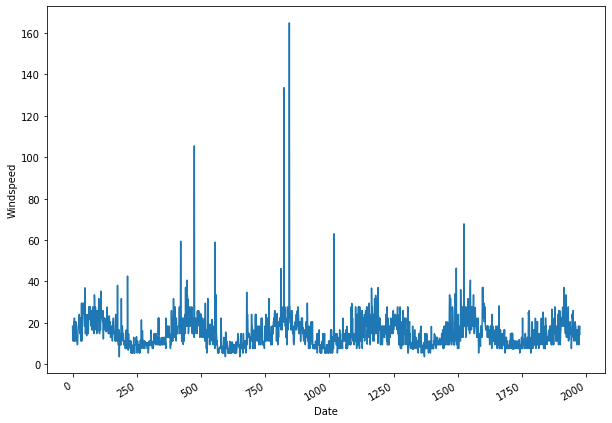

In [9]:
fig, ax = plt.subplots()

ax.plot(df['windspeed'])
ax.set_xlabel('Date')
ax.set_ylabel('Windspeed')



fig.autofmt_xdate()




In [10]:
df1 = df[['datetime','windspeed']]
df1.head()

,datetime,windspeed
0,2017-03-12,18.4
1,2017-03-13,12.6
2,2017-03-14,11.2
3,2017-03-15,12.2
4,2017-03-16,14.8


In [11]:
df1.columns = ['ds', 'y']
df1.head()

,ds,y
0,2017-03-12,18.4
1,2017-03-13,12.6
2,2017-03-14,11.2
3,2017-03-15,12.2
4,2017-03-16,14.8


In [12]:
train = df1[:-90]
test = df1[-90:]

In [13]:
model = Prophet()

In [14]:
model.fit(train);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = model.make_future_dataframe(periods=90)

In [16]:
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:-85]

,ds,yhat,yhat_lower,yhat_upper
1886,2022-05-11,19.561464,10.089939,28.819236
1887,2022-05-12,20.742461,12.117760,30.017118
1888,2022-05-13,20.029312,11.387112,28.635021
1889,2022-05-14,19.789691,10.819385,29.181186
1890,2022-05-15,20.025310,11.398356,29.108250


In [17]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1971,2022-08-04,14.539171,10.081512,28.141904,14.527336,14.549303,4.634385,4.634385,4.634385,0.926476,0.926476,0.926476,3.707908,3.707908,3.707908,0.0,0.0,0.0,19.173556
1972,2022-08-05,14.538180,9.034569,27.281076,14.525979,14.548558,3.814693,3.814693,3.814693,0.109620,0.109620,0.109620,3.705072,3.705072,3.705072,0.0,0.0,0.0,18.352873
1973,2022-08-06,14.537189,9.609490,27.566267,14.524746,14.547937,3.452643,3.452643,3.452643,-0.239615,-0.239615,-0.239615,3.692259,3.692259,3.692259,0.0,0.0,0.0,17.989832
1974,2022-08-07,14.536198,9.109867,27.158393,14.523383,14.547291,3.548864,3.548864,3.548864,-0.119492,-0.119492,-0.119492,3.668355,3.668355,3.668355,0.0,0.0,0.0,18.085061
1975,2022-08-08,14.535206,8.986378,26.874232,14.522117,14.546493,3.031384,3.031384,3.031384,-0.601049,-0.601049,-0.601049,3.632433,3.632433,3.632433,0.0,0.0,0.0,17.566591


In [18]:
test[['yhat', 'yhat_lower', 'yhat_upper']] = forecast[['yhat', 'yhat_lower', 'yhat_upper']]
test.head()

,ds,y,yhat,yhat_lower,yhat_upper
1886,2022-05-11,11.2,19.561464,10.089939,28.819236
1887,2022-05-12,16.6,20.742461,12.117760,30.017118
1888,2022-05-13,18.8,20.029312,11.387112,28.635021
1889,2022-05-14,18.4,19.789691,10.819385,29.181186
1890,2022-05-15,24.1,20.025310,11.398356,29.108250


In [19]:
test['baseline'] = train['y'][-90:].values
test.head()

,ds,y,yhat,yhat_lower,yhat_upper,baseline
1886,2022-05-11,11.2,19.561464,10.089939,28.819236,14.8
1887,2022-05-12,16.6,20.742461,12.117760,30.017118,9.4
1888,2022-05-13,18.8,20.029312,11.387112,28.635021,13.0
1889,2022-05-14,18.4,19.789691,10.819385,29.181186,14.8
1890,2022-05-15,24.1,20.025310,11.398356,29.108250,9.3


In [20]:
from sklearn.metrics import mean_absolute_error

prophet_mae = mean_absolute_error(test['y'], test['yhat'])
baseline_mae = mean_absolute_error(test['y'], test['baseline'])

print(prophet_mae)
print(baseline_mae)

4.625761100527435
7.084444444444443


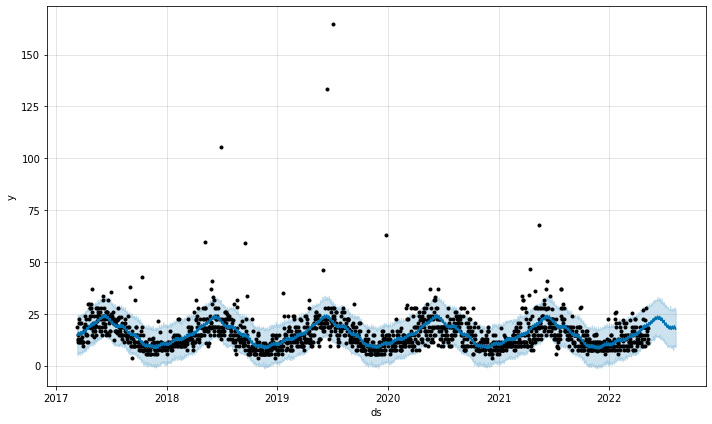

In [21]:
fig1 = model.plot(forecast)